In [1]:
import pandas

In [2]:
pandas.read_csv('pime_indians_diabetes.csv')

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset = pandas.read_csv('pime_indians_diabetes.csv', header = None)#we need to be specific to pandas that in this dataset we do not have header
# so consiser first line also record

In [4]:
df = dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y = dataset[8]#col 8 has value of patient has daibaetes or not so this is our target i.e y

In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [9]:
X = dataset[[0,1,2,3,4,5,6,7]]

In [10]:
from keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
model.get_config() # here we can see rn model is empty, it is like empty box

{'name': 'sequential', 'layers': []}

In [13]:
# to add layer we use Dense function : Multiple layer is called dense
from keras.layers import Dense

In [14]:
model.add(
    Dense(units = 4, # here units=4 -> number of neurons,
    kernel_initializer = "zeros", # Kernel_initializer="zeros" -> initialize weight as 0,
    bias_initializer = "zeros", # bias_initialize= "zeros" -> initialize bias as zero
    input_dim = 8, #input_dim=8 , dim stands for dimentions -> 8 is number of features we have
    activation = "relu", # relu[ Rectified Linear Unit ] is a function that give value in b/w 0 and infinity 
    )
)

Now our one layer is created!!

In [15]:
model.get_config() # now we can see here that we have created the layer with 8 feature and 4 neuron

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [16]:
# To check how many layer we have
model.get_layer #here we can see we have only one layer

<bound method Model.get_layer of <keras.engine.sequential.Sequential object at 0x00000179DA83CB20>>

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


It shows we have one layer and it will give 4 output and 36 parameter(8[feature] * 4[neurons] + 4[bias] == 36 parameter)

In [18]:
# add one more layer
# we dont need to specify the dimention as it will automatically detect
model.add(Dense(
    units = "4",
    activation = "relu",
    kernel_initializer = "zeros",
    bias_initializer = "zeros"
))

Now we have created 2nd layer

In [19]:
model.get_layer

<bound method Model.get_layer of <keras.engine.sequential.Sequential object at 0x00000179DA83CB20>>

In [20]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'ke

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


dense_1 is 2nd layer it shows it will give 4 output and has 20 parameter( 4[1st layer neuron] * 4[neurons] + 4[bias])

In [22]:
# Last layer: it usually have single neuron

model.add(
    Dense(
        units = 1,
        activation = "sigmoid", # sigmoid function -> gives output in 0 and 1
        kernel_initializer = "zeros",
        bias_initializer = "zeros",
    )
)

last layer is created which will give us output

In [23]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'ke

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


here dense_2 is our 3rd layer which will give output-> 1 (either 0 or 1 ) and has paramete

here we can see total 61 parameter it will find imagine in big data , image processing millions of paramenter they will find and it takes lots of computing power

In [25]:
# After model creation we need to compile the model to tell what is our loss funtion and which optimiser we are going to use
from keras.optimizers import Adam

In [26]:
model.compile(optimizer = Adam(), loss = "binary_crossentropy")
# binary_crossentropy is a loss funciton used in binary classification works in 0 and 1.

In [27]:
model.fit(X, y) # here we can see the loss we have

24/24 [==============================] - 0s 1ms/step - loss: 0.6917


# if we are not happy with the weight and bias then we can go back and reset the weight and bias and again train model
# this is called backpropogation
# epochs is use to set how many times we need to go back

In [28]:
model.fit(X, y, epochs = 100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6859
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6832
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6806
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6783
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6760
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6740
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6720
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6702
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6683
Epoch 11/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6667
Epoch 12/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6652
Epoch 13/100
24/24 [=================

Here we can see epochs train the model 100 times and we can see loss is decreased

In [29]:
model.save("diabetes_model.h5")

# To predict diabetes using PIMA diabetes data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
data = pd.read_csv("./pime_indians_diabetes.csv")

In [33]:
data.shape

(767, 9)

In [34]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [35]:
# check if any null value is present
data.isnull().values.any()

False

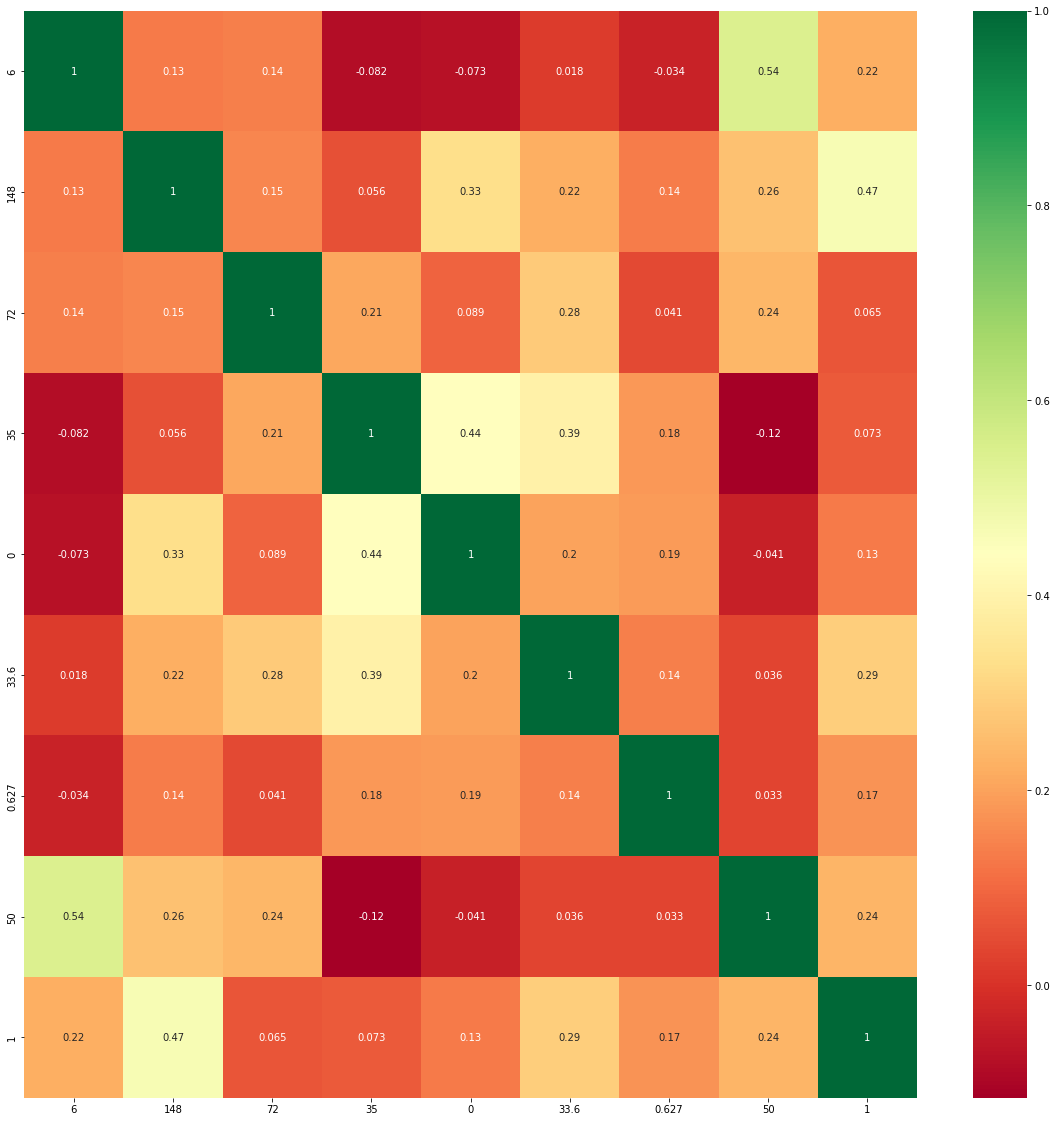

In [37]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [38]:
data.corr()

,6,148,72,35,0,33.6,0.627,50,1
6,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
148,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
72,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
35,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
0,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
33.6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
0.627,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
50,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
1,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000
